In [121]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import sys

In [152]:
class Conv(object):
    def __init__(self, input_channel, output_channel, kernel_size, stride):
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.stride = stride
        # stdv = 1. / np.sqrt(self.input_channel * self.kernel_size)
        # self.kernel = np.random.uniform(-stdv, stdv, (self.output_channel, self.input_channel, self.kernel_size, self.kernel_size))
        # self.bias = np.zeros((self.output_channel))    #???????????
        
        self.kernel = np.arange(self.output_channel*self.input_channel*self.kernel_size*self.kernel_size).reshape((self.output_channel, self.input_channel, self.kernel_size, self.kernel_size))
        self.bias = np.arange(self.output_channel)

    def forward(self, input):
        _, _, in_h, in_w = input.shape
        # pad_need_h = int((np.ceil(in_h / self.stride) - 1) * self.stride + self.kernel_size - in_h)
        # pad_top = int(pad_need_h/2)
        # pad_bot = pad_need_h -pad_top

        # pad_need_w = int((np.ceil(in_w / self.stride) - 1) * self.stride + self.kernel_size - in_w)
        # pad_left = int(pad_need_w / 2)
        # pad_right = pad_need_w - pad_left

        # self.input = np.lib.pad(input, ((0, 0), (0, 0), (pad_top, pad_bot), (pad_left, pad_right)), 'constant')
        self.input = input

        self.batch_size, _, self.h, self.w = self.input.shape
        self.output_h = int((self.h - self.kernel_size)/self.stride)+1
        self.output_w = int((self.w - self.kernel_size)/self.stride)+1

        self.out = np.zeros((self.batch_size, self.output_channel, self.output_h, self.output_w))
        for i in range(self.batch_size):
            for ch in range(self.output_channel):
                for r in range(self.output_h):
                    for c in range(self.output_w):
                        current = self.input[i, :, r*self.stride:r*self.stride+self.kernel_size, c*self.stride:c*self.stride+self.kernel_size]
                        self.out[i, ch, r, c] = current.flatten().dot(self.kernel[ch].flatten()) + self.bias[ch]
        
#         for r in range(self.output_h):
#             for c in range(self.output_w):
#                 current = self.input[:, :, r * self.stride:r * self.stride + self.kernel_size, c * self.stride:c * self.stride + self.kernel_size]
#                 self.out[:, :, r, c] = np.einsum('ijkl,mjkl->im', current, self.kernel) + self.bias
        return self.out

        
    

In [153]:
img = skimage.data.chelsea()
# gray = skimage.color.rgb2gray(img)
print(img.shape, gray.shape)
# plt.imshow(img)
# plt.show()

# plt.imshow(gray, plt.cm.gray)
# plt.show()

(300, 451, 3) (300, 451)


In [154]:
img = skimage.data.chelsea()
img = img.transpose(2, 0, 1)[np.newaxis, :]

conv = Conv(3, 3, 3, 1)
out = conv.forward(img)
print(out.shape)

(1, 3, 298, 449)


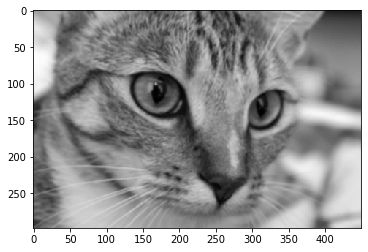

In [155]:
plt.imshow(out[0,0], plt.cm.gray)
plt.show()

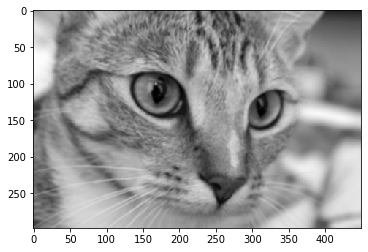

In [156]:
plt.imshow(out[0,1], plt.cm.gray)
plt.show()

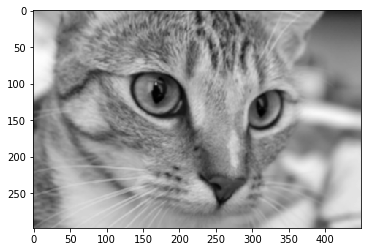

In [157]:
plt.imshow(out[0,2], plt.cm.gray)
plt.show()

x = [batch_size, inch, h1, w1]  
k = [outch, inch, h2, w2]  
b = [outch]  
o = [batch_size, outch, h3, w3]  

h3 = int((h1 - h2) / s) + 1  
w3 = int((w1 - w2) / s) + 1  

out = np.zeros((batch_size, outch, h3, w3))  
for i in range(batch_size):  
   for ch in range(outch):  
       for r in range(h3):  
           for c in range(w3):  
               current = x[i, :, r*s:r*s + h2, c*s:c*s + w3]  
               out[i, ch, r, c] = current.flatten().dot(k[ch].flatten()) + bias[ch]  

In [158]:
x = np.arange(75).reshape(1, 3, 5, 5)
print(x)

conv = Conv(3, 3, 3, 1)
out = conv.forward(x)
# print(conv.kernel)
# print(conv.bias)
print(out.shape)
print(out)




[[[[ 0  1  2  3  4]
   [ 5  6  7  8  9]
   [10 11 12 13 14]
   [15 16 17 18 19]
   [20 21 22 23 24]]

  [[25 26 27 28 29]
   [30 31 32 33 34]
   [35 36 37 38 39]
   [40 41 42 43 44]
   [45 46 47 48 49]]

  [[50 51 52 53 54]
   [55 56 57 58 59]
   [60 61 62 63 64]
   [65 66 67 68 69]
   [70 71 72 73 74]]]]
(1, 3, 3, 3)
[[[[15219. 15570. 15921.]
   [16974. 17325. 17676.]
   [18729. 19080. 19431.]]

  [[37819. 38899. 39979.]
   [43219. 44299. 45379.]
   [48619. 49699. 50779.]]

  [[60419. 62228. 64037.]
   [69464. 71273. 73082.]
   [78509. 80318. 82127.]]]]
